In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import time

import models
import flows

In [2]:
sns.set_style("darkgrid")

In [3]:
N = 500
data = sio.loadmat("case3.mat")
x1 = data["x1"]
x2 = data["x2"]
y1 = data["y1"]
y2 = data["y2"]
w1 = data["w1"]
w2 = data["w2"]
A = data["A"]
k = data["k"]

x1_train = x1[0, :].reshape([-1, 1])
y1_train = y1[:N].T
x2_train = x2[0, :].reshape([-1, 1])
y2_train = y2[:N].T
w1_train = w1[:N]
w2_train = w2[:N]
A1_train = A[:N]
A2_train = A[w1.shape[0]:w1.shape[0]+N]
k1_train = k[:N]
k2_train = k[w1.shape[0]:w1.shape[0]+N]

#### Multi-first-layer neural networks

In [4]:
meta = models.Meta2(num_tasks=2*N, dim=50, eps=0.0, scale=0.05)

In [5]:
y1_train.shape, y2_train.shape

((32, 500), (64, 500))

In [6]:
t0 = time.time()
loss = meta.train(
    x1_train,
    y1_train,
    x2_train,
    y2_train,
    niter=50000,
    ftol=1e-6,
)
t1 = time.time()

0 7.1399393 , time:  0.40787363052368164
1000 0.9094689 , time:  17.53722381591797
2000 0.13466375 , time:  17.613868474960327
3000 0.034495804 , time:  17.612767696380615
4000 0.014765963 , time:  18.078073740005493
5000 0.00436373 , time:  17.68087124824524
6000 0.0030175853 , time:  17.517860412597656
7000 0.0008220795 , time:  17.6380832195282
8000 0.00053718 , time:  17.449076652526855
9000 0.00043084042 , time:  18.051100254058838
10000 0.00031260162 , time:  17.811556577682495
11000 0.0002592538 , time:  17.694443702697754
12000 0.00022255603 , time:  17.56522560119629
13000 0.00019616706 , time:  18.2252836227417
14000 0.00016742625 , time:  17.879605293273926
15000 0.00016667909 , time:  17.692066192626953
16000 0.00014035183 , time:  17.85419273376465
17000 0.00012860954 , time:  17.569778203964233
18000 0.00011324403 , time:  17.69983673095703
19000 0.00011006738 , time:  17.55209493637085
20000 9.6717304e-05 , time:  17.60174036026001
21000 9.127969e-05 , time:  18.15251541

880.1640422344208


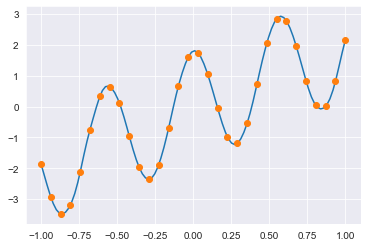

In [7]:
meta.restore()
print(t1 - t0)
x_test = np.linspace(-1, 1, 100).reshape([-1, 1])
out1 = meta.call(
    tf.constant(x_test, tf.float32), meta.ws[:N], meta.bs[:N]
)
j = 9
plt.plot(x_test, out1[:, j])
plt.plot(x1_train[:, 0], y1_train[:, j], 'o')

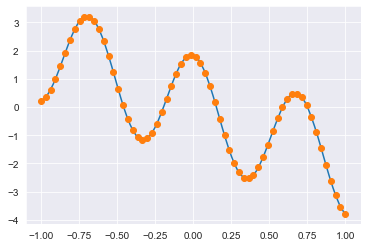

In [8]:
x_test = np.linspace(-1, 1, 100).reshape([-1, 1])
out2 = meta.call(
    tf.constant(x_test, tf.float32), meta.ws[N:], meta.bs[N:]
)
j = 9
plt.plot(x_test, out2[:, j])
plt.plot(x2_train[:, 0], y2_train[:, j], 'o')

In [10]:
# xi = meta_model.xi.numpy()
permutation = list(np.arange(50, 100, 1)) + list(np.arange(0, 50, 1))
# permutation = list(np.arange(33, 65, 1)) + list(np.arange(0, 33, 1))

nf = flows.MAF(
    dim=100,
    permutation=permutation,
    hidden_layers=[128, 128],
    num_bijectors=10,
    activation=tf.nn.relu,
)
ws = meta.ws.numpy()
bs = meta.bs.numpy()
data = np.concatenate([ws, bs], axis=-1)[:, 0, :]

In [13]:
t2 = time.time()
loss = nf.train_batch(tf.constant(data, tf.float32), nepoch=1000)
t3 = time.time()

0 72.80089
1 48.679165
2 24.00844
3 -6.0543904
4 -32.72462
5 -49.240448
6 -60.369835
7 -69.364845
8 -75.542145
9 -81.29855
10 -84.859566
11 -89.269485
12 -92.280136
13 -92.7189
14 -97.226494
15 -100.432144
16 -103.02005
17 -105.87025
18 -106.77888
19 -109.87788
20 -112.18932
21 -113.4147
22 -115.726006
23 -116.970726
24 -118.77223
25 -120.4567
26 -121.61648
27 -123.22709
28 -124.60007
29 -125.92767
30 -126.10866
31 -128.12804
32 -128.8785
33 -130.37521
34 -131.50475
35 -131.38278
36 -132.86516
37 -135.03973
38 -135.94096
39 -136.79326
40 -137.23029
41 -136.04712
42 -138.67773
43 -139.17534
44 -140.98413
45 -141.958
46 -141.91397
47 -143.17068
48 -142.03677
49 -144.28021
50 -144.79366
51 -146.96825
52 -145.81404
53 -145.89635
54 -148.35628
55 -147.391
56 -149.46335
57 -150.09479
58 -150.40154
59 -151.39459
60 -152.1397
61 -153.74013
62 -152.67674
63 -151.92531
64 -152.68463
65 -153.85703
66 -154.39055
67 -154.95291
68 -155.5268
69 -155.07288
70 -155.99934
71 -156.61412
72 -157.41917
73 

561 -129.31438
562 -129.62886
563 -129.56644
564 -129.71819
565 -129.69789
566 -129.84337
567 -129.73494
568 -129.80083
569 -130.03993
570 -129.96991
571 -130.05344
572 -130.16777
573 -130.20634
574 -130.2733
575 -130.43849
576 -130.63907
577 -130.55745
578 -130.65033
579 -130.6754
580 -130.91437
581 -131.01358
582 -131.06311
583 -130.75331
584 -131.02379
585 -131.15724
586 -131.28606
587 -131.41185
588 -131.48773
589 -131.52153
590 -131.57983
591 -131.43698
592 -131.61418
593 -131.81349
594 -131.80652
595 -131.956
596 -132.09741
597 -132.06262
598 -132.28905
599 -132.2496
600 -132.29153
601 -132.3177
602 -132.338
603 -132.52135
604 -132.60721
605 -132.37138
606 -132.48369
607 -132.593
608 -132.78934
609 -132.7014
610 -132.95312
611 -133.05818
612 -133.04475
613 -133.15851
614 -133.25128
615 -133.16325
616 -133.51479
617 -133.53441
618 -133.38893
619 -133.52852
620 -133.74748
621 -133.66951
622 -133.76352
623 -133.70433
624 -133.84796
625 -133.858
626 -133.73792
627 -133.91806
628 -134

In [37]:
print(t3 - t2)

220.1837077140808


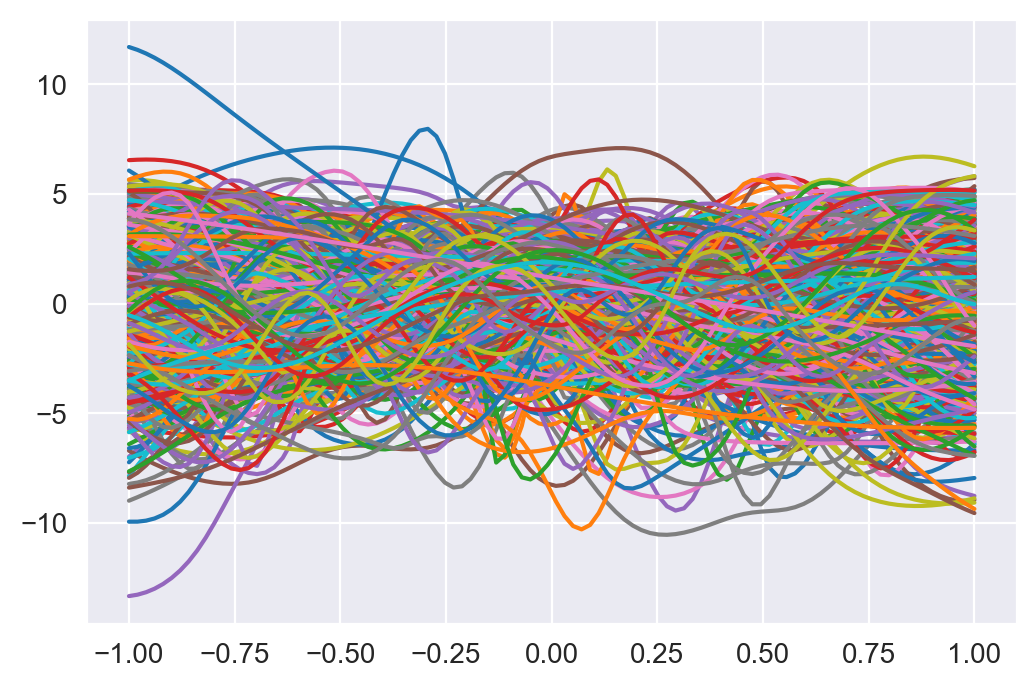

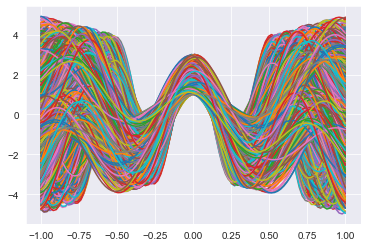

In [16]:
nf.restore()
sample_fn = tf.function(nf.sample)
samples = sample_fn(1000)
ws, bs = tf.split(samples, 2, axis=-1)
ws, bs = ws[:, None, :], bs[:, None, :]
x_test = tf.constant(np.linspace(-1, 1, 100).reshape([-1, 1]), tf.float32)
# y_test = tf.constant(y_train, tf.float32)

out = meta.call(x_test, ws, bs)
plt.figure(dpi=200)
for i in range(1000):
    plt.plot(x_test, out[:, i])
plt.savefig("garbage.png")

ws, bs = tf.split(data, 2, axis=-1)
ws, bs = ws[:, None, :], bs[:, None, :]
out = meta.call(x_test, ws, bs)
plt.figure()
for i in range(1000):
    plt.plot(x_test, out[:, i])

[6.8737307] [12.1752461]


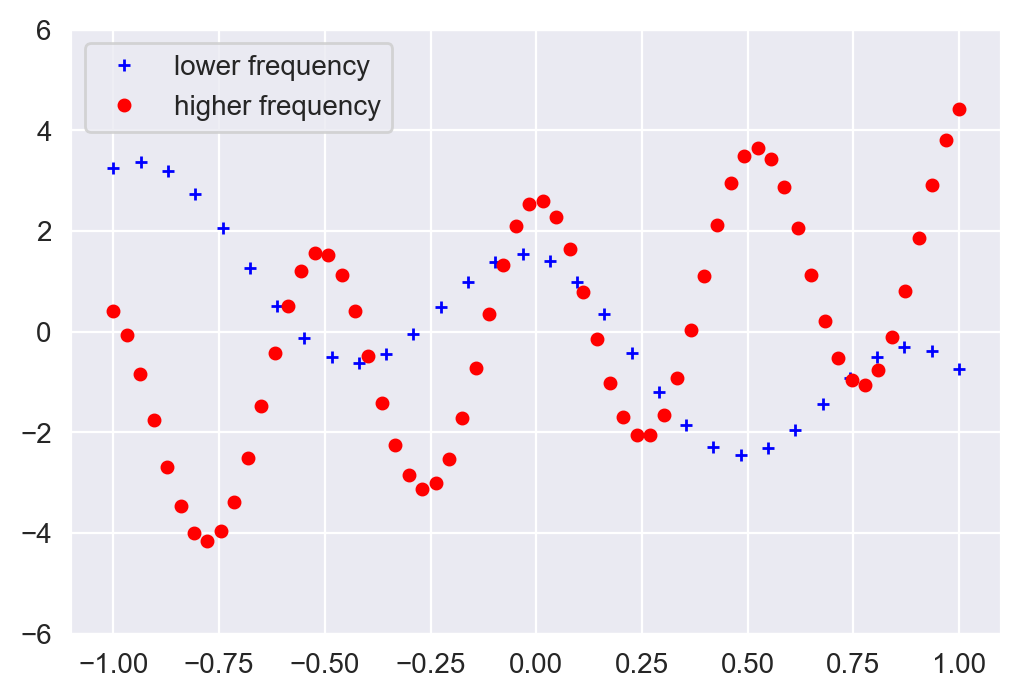

In [13]:
# out = meta.call(x_test, ws, bs)
plt.figure(dpi=200)
# for i in range(1):
plt.plot(x1_train, y1_train[:, 0], '+', color="b", markersize=4, label="lower frequency")
# for i in range(1):
plt.plot(x2_train, y2_train[:, 0], 'o', color="r", markersize=4, label="higher frequency")
plt.legend()
plt.ylim([-6, 6])
print(w1[0], w2[0])

plt.savefig("fig4/training_data.png")

In [36]:
w2_train

array([[9.29745675],
       [8.03155725],
       [6.85822925],
       [8.6106057 ],
       [8.00855362],
       [7.40114661],
       [7.11319859],
       [6.83296463],
       [8.8003101 ],
       [9.1888694 ],
       [6.3563492 ],
       [7.26113805],
       [8.77025099],
       [6.85440925],
       [8.05312721],
       [8.90593203],
       [8.90725475],
       [8.98222567],
       [6.73219853],
       [7.65860356],
       [9.15849233],
       [7.63858951],
       [8.59696421],
       [6.91904248],
       [6.82859701],
       [8.05996564],
       [8.63943691],
       [8.93373041],
       [6.50243257],
       [7.13823715],
       [8.88080928],
       [8.72660741],
       [7.36267759],
       [8.75935182],
       [8.45328   ],
       [8.58151788],
       [6.88349495],
       [8.94825323],
       [7.61247725],
       [9.08060624],
       [6.81289771],
       [8.75529334],
       [8.64919049],
       [8.93661851],
       [7.90345927],
       [6.96438214],
       [7.31536941],
       [9.093

In [28]:
samples[:, 0]

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 4.53371927e-03, -2.88805403e-02, -7.65143782e-02,  4.99638528e-01,
       -2.29976147e-01,  1.03599668e-01, -3.95401835e-01,  2.45195031e-01,
       -1.74254999e-01,  9.07245129e-02, -2.29150161e-01,  1.12578310e-02,
        2.17095643e-01,  8.95055830e-02, -5.05695641e-01, -8.10232311e-02,
       -1.39701646e-02,  1.45777613e-01,  2.91920334e-01, -1.72658190e-01,
        5.52835725e-02, -4.20530438e-01, -2.10163221e-01,  1.59189850e-02,
        3.70449930e-01,  8.07977766e-02,  1.35365337e-01, -2.20615834e-01,
       -7.42164403e-02,  5.66166602e-02, -2.25578859e-01, -1.41927749e-01,
        1.75950781e-01,  1.18876860e-01,  2.50254273e-01,  5.36286049e-02,
        5.69976307e-02,  5.99923469e-02,  1.75352871e-01,  9.40321535e-02,
        2.57031173e-01, -2.76597917e-01,  3.76599245e-02, -1.46949843e-01,
        1.08653292e-01,  2.02240422e-02, -2.11329296e-01, -1.28546312e-01,
       -4.60271895e-01, -5.05557239e-01,  4.6730572

#### Multi-head neural networks

In [41]:
meta = models.Meta(num_tasks=2*N, dim=50, eps=0.0, scale=0.05)

In [43]:
t0 = time.time()
loss = meta.train(
    x1_train,
    y1_train,
    x2_train,
    y2_train,
    niter=50000,
    ftol=1e-8,
)
t1 = time.time()

0 1.1169352e-05 , time:  0.0010030269622802734
1000 7.9379913e-07 , time:  1.0591683387756348
2000 2.3789594e-06 , time:  1.1612694263458252
3000 7.1352764e-07 , time:  1.1384737491607666
4000 6.691172e-07 , time:  1.2269833087921143
5000 2.2602887e-06 , time:  1.0802850723266602
6000 1.1641234e-05 , time:  1.1586906909942627
7000 2.2458185e-06 , time:  1.1019136905670166
8000 1.1326104e-06 , time:  1.1244850158691406
9000 6.652264e-07 , time:  1.1097424030303955
10000 6.4554024e-07 , time:  1.1223106384277344
11000 2.8116422e-06 , time:  1.2165801525115967
12000 8.090449e-06 , time:  1.1223385334014893
13000 1.5826455e-06 , time:  1.1873388290405273
14000 5.937627e-07 , time:  1.0645673274993896
15000 5.157533e-07 , time:  1.0850985050201416
16000 5.156426e-07 , time:  1.193166732788086
17000 5.002521e-07 , time:  1.143336534500122
18000 0.00048417883 , time:  1.2270481586456299
19000 3.0517433e-05 , time:  1.0959062576293945
20000 7.168863e-05 , time:  1.106078863143921
21000 4.43167

56.86381220817566


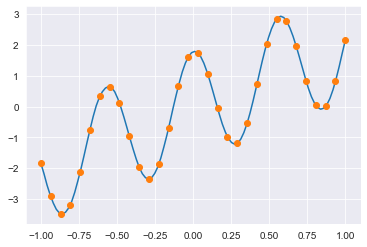

In [49]:
meta.restore()
print(t1 - t0)
x_test = np.linspace(-1, 1, 100).reshape([-1, 1])
out1 = meta.call(
    tf.constant(x_test, tf.float32), meta.heads[:, :N]
)
j = 9
plt.plot(x_test, out1[:, j])
plt.plot(x1_train[:, 0], y1_train[:, j], 'o')

In [48]:
meta.heads.shape

TensorShape([51, 1000])

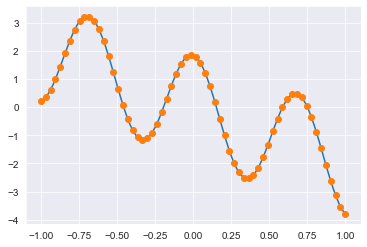

In [50]:
x_test = np.linspace(-1, 1, 100).reshape([-1, 1])
out2 = meta.call(
    tf.constant(x_test, tf.float32), meta.heads[:, N:]
)
j = 9
plt.plot(x_test, out2[:, j])
plt.plot(x2_train[:, 0], y2_train[:, j], 'o')

In [51]:
# xi = meta_model.xi.numpy()
permutation = list(np.arange(26, 51, 1)) + list(np.arange(0, 26, 1))

nf = flows.MAF(
    dim=51,
    permutation=permutation,
    hidden_layers=[128, 128],
    num_bijectors=10,
    activation=tf.nn.relu,
)
heads = meta.heads.numpy().T
heads = np.tile(heads, [1000//N//2, 1])
data = heads

In [53]:
t2 = time.time()
loss = nf.train_batch(tf.constant(data, tf.float32), nepoch=1000)
t3 = time.time()

0 0.75498587
1 -37.42788
2 -49.322697
3 -64.82846
4 -78.60277
5 -80.24908
6 -93.124504
7 -97.82094
8 -97.15388
9 -103.4596
10 -106.67414
11 -100.22296
12 -108.38215
13 -111.682785
14 -113.709
15 -95.76266
16 -111.03094
17 -115.19886
18 -117.16714
19 -120.928314
20 -114.82872
21 -120.269844
22 -121.00922
23 -124.82833
24 -120.431305
25 -117.5303
26 -125.61522
27 -117.14289
28 -125.56389
29 -125.33961
30 -131.39784
31 -117.1345
32 -127.31888
33 -122.440346
34 -128.93697
35 -130.29866
36 -132.74022
37 -131.71715
38 -131.1955
39 -133.49736
40 -135.72159
41 -130.32903
42 -137.36446
43 -126.002
44 -136.99994
45 -136.4801
46 -140.784
47 -129.64882
48 -139.2871
49 -129.97084
50 -136.51512
51 -136.74516
52 -141.1064
53 -141.15703
54 -139.94579
55 -145.56535
56 -143.76906
57 -135.65149
58 -144.47966
59 -143.78543
60 -149.33438
61 -145.3575
62 -147.80153
63 -146.34958
64 -147.75069
65 -129.39545
66 -139.31602
67 -147.04747
68 -114.207565
69 -133.33546
70 -144.77083
71 -126.672264
72 -142.85962
73

562 -192.27188
563 -192.51282
564 -188.53519
565 -185.163
566 -193.94296
567 -192.90822
568 -189.53674
569 -189.70357
570 -189.3046
571 -190.92825
572 -193.80553
573 -193.79764
574 -190.04979
575 -185.91412
576 -175.18282
577 -186.47943
578 -193.71024
579 -194.37163
580 -179.91269
581 -178.50885
582 -190.5262
583 -191.44641
584 -191.15005
585 -188.56528
586 -189.10509
587 -192.95131
588 -190.0283
589 -190.57018
590 -191.91486
591 -189.55556
592 -178.52052
593 -191.70348
594 -193.9281
595 -185.96596
596 -188.03313
597 -191.67766
598 -193.2124
599 -193.99081
600 -186.8655
601 -194.0704
602 -192.13344
603 -184.05763
604 -185.85419
605 -195.29124
606 -185.78203
607 -186.02577
608 -190.13986
609 -194.55356
610 -184.48477
611 -186.6715
612 -191.71188
613 -194.0406
614 -184.91632
615 -186.40668
616 -189.88481
617 -189.71016
618 -190.46657
619 -189.40048
620 -190.85568
621 -193.71033
622 -184.40518
623 -193.26779
624 -191.1472
625 -187.46173
626 -193.58629
627 -192.69415
628 -191.53491
629 -18

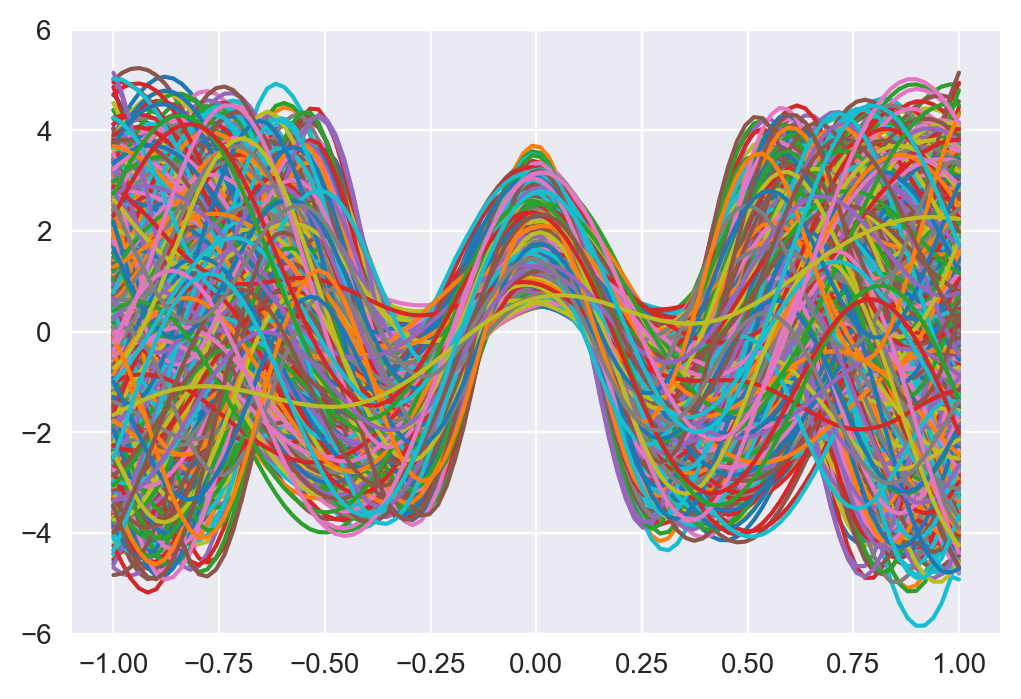

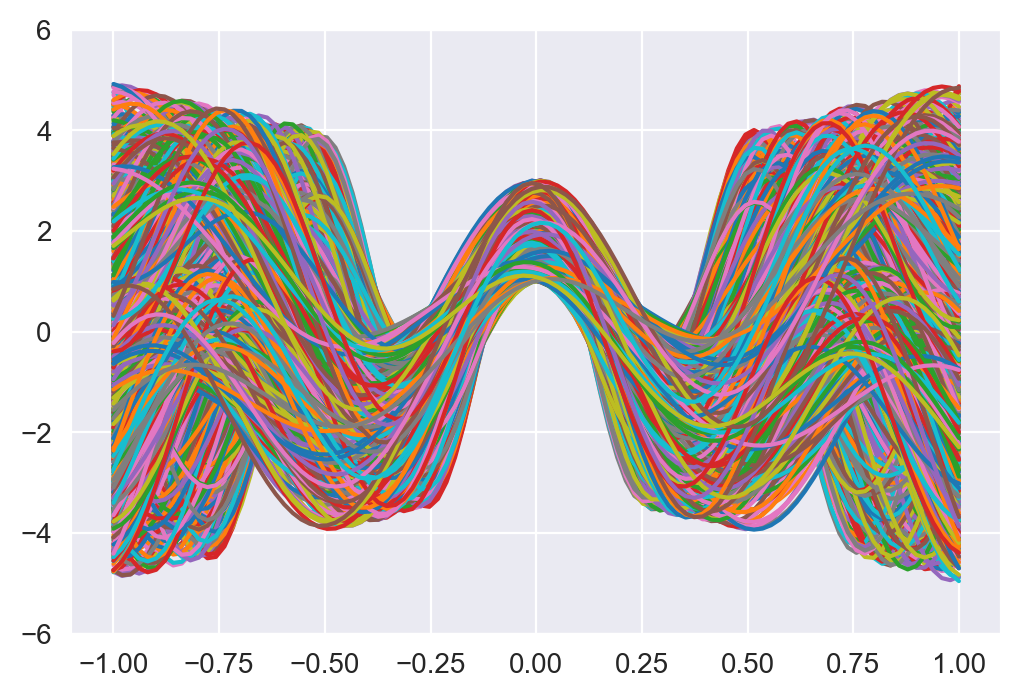

In [74]:
nf.restore()
sample_fn = tf.function(nf.sample)
heads = sample_fn(1000)
x_test = tf.constant(np.linspace(-1, 1, 100).reshape([-1, 1]), tf.float32)
# y_test = tf.constant(y_train, tf.float32)
out = meta.call(x_test, tf.transpose(heads))
plt.figure(dpi=200)
for i in range(1000):
    plt.plot(x_test, out[:, i])
plt.ylim([-6, 6])
plt.savefig("learned_distribution.png")

# plt.figure()
# heads = meta.heads.numpy().T
# heads = np.tile(heads, [1000//2//N, 1])
# out = meta.call(x_test, tf.transpose(heads))
# for i in range(1000):
#     plt.plot(x_test, out[:, i])
# plt.ylim([-6, 6])
plt.figure(dpi=200)
for i in range(500):
    plt.plot(x_test, A1_train[i]*np.cos(w1_train[i]*x_test)+2*k1_train[i]*x_test)

for i in range(500):
    plt.plot(x_test, A2_train[i]*np.cos(w2_train[i]*x_test)+2*k2_train[i]*x_test)
plt.ylim([-6, 6])
plt.savefig("training_data.png")

In [70]:
A1_train.shape

(500, 1)

In [71]:
A2_train.shape

(500, 1)

In [67]:
A1_train

array([[1.89227858],
       [2.13502482],
       [2.2053098 ],
       [1.8946667 ],
       [1.18668953],
       [1.82335346],
       [2.69416661],
       [1.59376785],
       [2.71759773],
       [1.78115877],
       [1.70933389],
       [2.38065048],
       [2.16148267],
       [2.60395543],
       [2.58995459],
       [2.04732709],
       [1.46977978],
       [1.83494856],
       [1.52777032],
       [2.23383599],
       [1.37055739],
       [1.71862414],
       [1.73213375],
       [1.35502602],
       [1.33089807],
       [2.39177172],
       [2.16960056],
       [2.35797309],
       [1.35249094],
       [1.36570117],
       [1.17353512],
       [2.00888616],
       [2.38475463],
       [1.46227045],
       [2.46008018],
       [2.03553604],
       [2.83968688],
       [1.81572591],
       [1.59211027],
       [2.50412095],
       [2.16572246],
       [1.71591903],
       [2.48557789],
       [1.71196978],
       [2.77636501],
       [2.61614014],
       [2.33895918],
       [1.638